In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

data = pd.read_csv("winequality-red.csv")

print("Data shape: ", data.shape)
print(data.head())
print(data.info())
print(data.describe())

Data shape:  (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  ...  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076  ...   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098  ...   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092  ...   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075  ...   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076  ...   0.9978  3.51       0.56      9.4        5

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_12780\730267111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=data, palette='coolwarm')


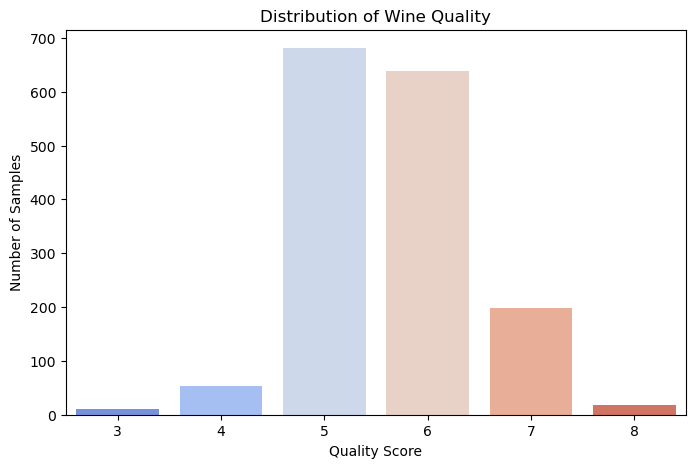

In [57]:
target = 'quality'
print(data[target].describe())
plt.figure(figsize=(8, 5))
sns.countplot(x=target, data=data, palette='coolwarm')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Number of Samples')
plt.show()

In [58]:
data['quality_label'] = data['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')
data['acid_ratio'] = data['fixed acidity'] / (data['volatile acidity'] + 1)
data['sulfur_ratio'] = data['free sulfur dioxide'] / (data['total sulfur dioxide'] + 1)

label_mapping = {
    'low': 0, 'medium': 1, 'high': 2
}
data['quality_label'] = data['quality_label'].map(label_mapping)

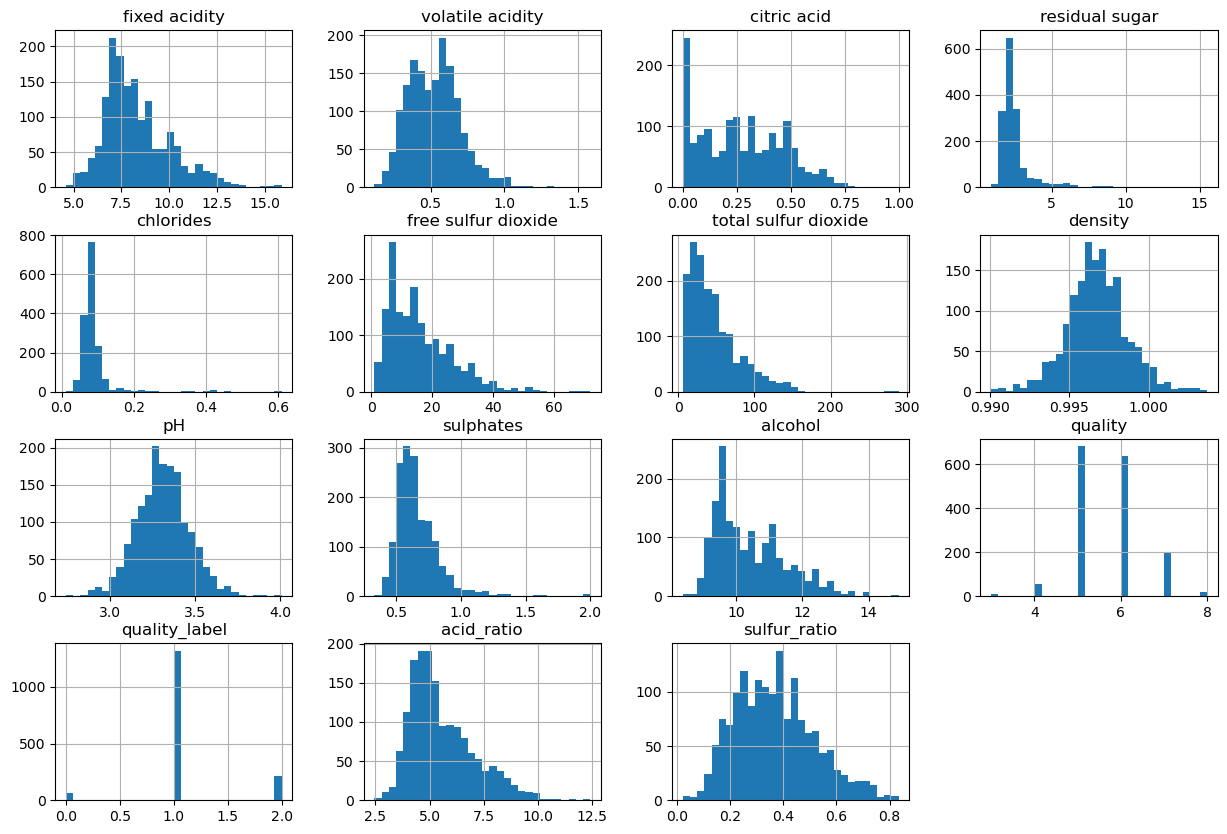

In [59]:
data.hist(bins=30, figsize=(15, 10))
plt.show()

In [60]:
from scipy.stats import skew

numeric_feats = data.select_dtypes(include=[np.number]).columns
numeric_feats = numeric_feats.drop('quality', errors='ignore')

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

high_skew = skewness[abs(skewness['Skew']) > 0.75].index

data[high_skew] = np.log1p(data[high_skew])


📘 Logistic Regression
Accuracy: 0.7344
F1 Score: 0.7276
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.89      0.80      0.84        10
           5       0.68      0.76      0.72       130
           6       0.74      0.65      0.69       132
           7       0.89      1.00      0.94        42
           8       0.00      0.00      0.00         5

    accuracy                           0.73       320
   macro avg       0.53      0.54      0.53       320
weighted avg       0.73      0.73      0.73       320



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


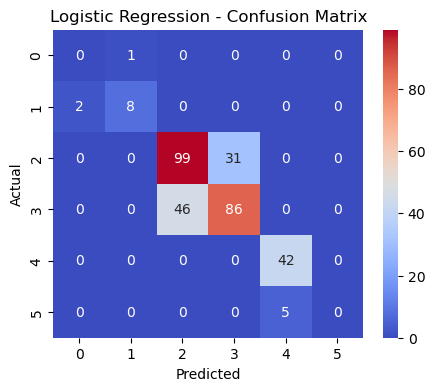

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: 


📘 Multinomial Logistic Regression
Accuracy: 0.7344
F1 Score: 0.7276
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.89      0.80      0.84        10
           5       0.68      0.76      0.72       130
           6       0.74      0.65      0.69       132
           7       0.89      1.00      0.94        42
           8       0.00      0.00      0.00         5

    accuracy                           0.73       320
   macro avg       0.53      0.54      0.53       320
weighted avg       0.73      0.73      0.73       320



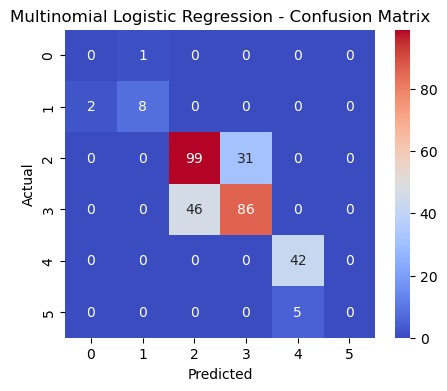


📘 K-Nearest Neighbors
Accuracy: 0.7281
F1 Score: 0.7202
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.89      0.80      0.84        10
           5       0.71      0.68      0.69       130
           6       0.68      0.73      0.70       132
           7       0.89      0.98      0.93        42
           8       0.00      0.00      0.00         5

    accuracy                           0.73       320
   macro avg       0.53      0.53      0.53       320
weighted avg       0.71      0.73      0.72       320



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


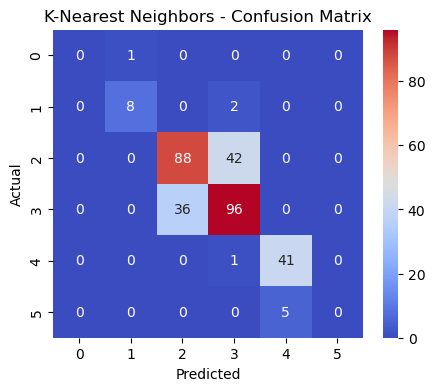


📘 Support Vector Machine
Accuracy: 0.7406
F1 Score: 0.7315
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.91      1.00      0.95        10
           5       0.69      0.74      0.71       130
           6       0.72      0.67      0.70       132
           7       0.89      1.00      0.94        42
           8       0.00      0.00      0.00         5

    accuracy                           0.74       320
   macro avg       0.54      0.57      0.55       320
weighted avg       0.72      0.74      0.73       320



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


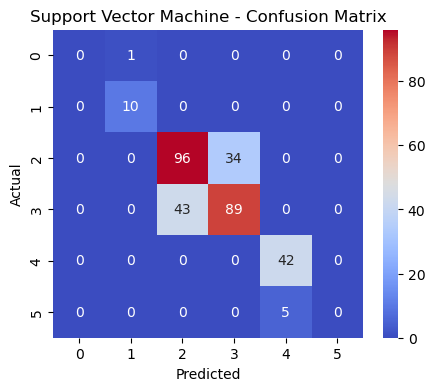


📘 Decision Tree
Accuracy: 0.6906
F1 Score: 0.6925
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.88      0.70      0.78        10
           5       0.66      0.72      0.69       130
           6       0.70      0.63      0.66       132
           7       0.88      0.88      0.88        42
           8       0.00      0.00      0.00         5

    accuracy                           0.69       320
   macro avg       0.52      0.49      0.50       320
weighted avg       0.70      0.69      0.69       320



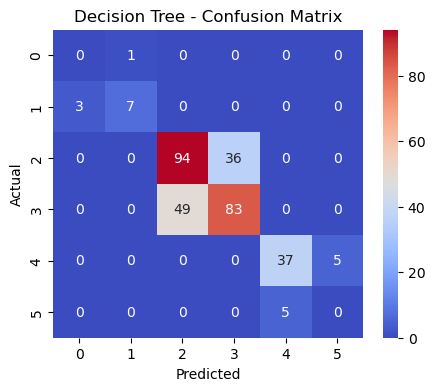


📘 Random Forest
Accuracy: 0.7531
F1 Score: 0.7454
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.91      1.00      0.95        10
           5       0.70      0.77      0.74       130
           6       0.75      0.68      0.71       132
           7       0.89      0.98      0.93        42
           8       0.00      0.00      0.00         5

    accuracy                           0.75       320
   macro avg       0.54      0.57      0.56       320
weighted avg       0.74      0.75      0.75       320



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


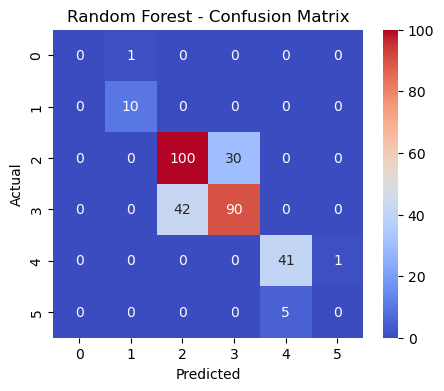


📘 Naive Bayes
Accuracy: 0.7094
F1 Score: 0.7005
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.91      1.00      0.95        10
           5       0.66      0.68      0.67       130
           6       0.67      0.66      0.67       132
           7       0.89      1.00      0.94        42
           8       0.00      0.00      0.00         5

    accuracy                           0.71       320
   macro avg       0.52      0.56      0.54       320
weighted avg       0.69      0.71      0.70       320



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


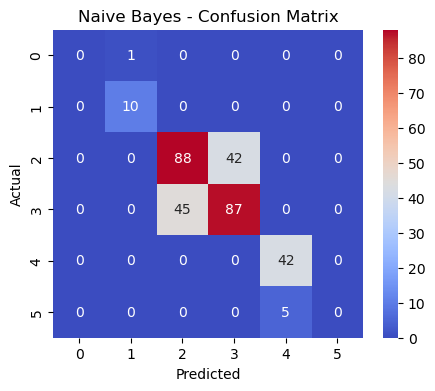


🏆 Model Comparison
                             Model  Accuracy  F1 Score
5                    Random Forest  0.753125  0.745419
3           Support Vector Machine  0.740625  0.731542
0              Logistic Regression  0.734375  0.727632
1  Multinomial Logistic Regression  0.734375  0.727632
2              K-Nearest Neighbors  0.728125  0.720223
6                      Naive Bayes  0.709375  0.700501
4                    Decision Tree  0.690625  0.692501


In [61]:
X = data.drop(target, axis=1)
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', C=1, gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # multiclass F1
    results.append((name, acc, f1))

    print(f"\n📘 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Summary of results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"]).sort_values(by="F1 Score", ascending=False)
print("\n🏆 Model Comparison")
print(results_df)

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print("Best Random Forest params:", grid_rf.best_params_)
print("Best RF F1 Score:", grid_rf.best_score_)

Best Random Forest params: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best RF F1 Score: 0.6239076237338939


In [63]:
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7875
F1 Score: 0.7786
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.91      1.00      0.95        10
           5       0.76      0.77      0.76       130
           6       0.77      0.76      0.76       132
           7       0.89      1.00      0.94        42
           8       0.00      0.00      0.00         5

    accuracy                           0.79       320
   macro avg       0.55      0.59      0.57       320
weighted avg       0.77      0.79      0.78       320

Confusion Matrix:
 [[  0   1   0   0   0   0]
 [  0  10   0   0   0   0]
 [  0   0 100  30   0   0]
 [  0   0  32 100   0   0]
 [  0   0   0   0  42   0]
 [  0   0   0   0   5   0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [64]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1
)
grid_svm.fit(X_train, y_train)

print("Best SVM params:", grid_svm.best_params_)
print("Best SVM F1 Score:", grid_svm.best_score_)

Best SVM params: {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly'}
Best SVM F1 Score: 0.607077210700528


In [65]:
best_svm = SVC(
    C=10,
    class_weight='balanced',
    gamma='scale',
    kernel='poly'
)

best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7250
F1 Score: 0.7236
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.90      0.90      0.90        10
           5       0.69      0.75      0.72       130
           6       0.72      0.67      0.70       132
           7       0.88      0.88      0.88        42
           8       0.00      0.00      0.00         5

    accuracy                           0.72       320
   macro avg       0.53      0.53      0.53       320
weighted avg       0.72      0.72      0.72       320

Confusion Matrix:
 [[ 0  1  0  0  0  0]
 [ 1  9  0  0  0  0]
 [ 0  0 97 33  0  0]
 [ 0  0 43 89  0  0]
 [ 0  0  0  1 37  4]
 [ 0  0  0  0  5  0]]


In [66]:
joblib.dump(best_rf, "best_random_forest.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler exported successfully.")

Model and scaler exported successfully.
